# Model training

#### Import Data and Required Packages

In [185]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data

In [186]:
df = pd.read_csv('data/student_performance.csv')

In [187]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [188]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [189]:
X = df.drop(columns=['math_score'])
y = df['math_score']

In [190]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [191]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [192]:
num_features = X.select_dtypes(exclude="str").columns
cat_features = X.select_dtypes(include="str").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [193]:
X = preprocessor.fit_transform(X)

In [194]:
X.shape

(1000, 19)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [196]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [197]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Support Vector Regressor": SVR()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_model_mae, train_model_mse, train_model_rmse, train_model_r2 = evaluate_model(y_train, y_train_pred)
    test_model_mae, test_model_mse, test_model_rmse, test_model_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance on Training set:')
    print(f'Mean Absolute Error: {train_model_mae}')
    print(f'Mean Squared Error: {train_model_mse}')
    print(f'Root Mean Squared Error: {train_model_rmse}')
    print(f'R2 Score: {train_model_r2}')

    print('----------------------------------')

    print('Model performance on Test set:')
    print(f'Mean Absolute Error: {test_model_mae}')
    print(f'Mean Squared Error: {test_model_mse}')
    print(f'Root Mean Squared Error: {test_model_rmse}')
    print(f'R2 Score: {test_model_r2}')

    r2_list.append(test_model_r2)
    print('='*30)
    print('\n')
    


Linear Regression
Model performance on Training set:
Mean Absolute Error: 4.248909399597664
Mean Squared Error: 28.404112513768688
Root Mean Squared Error: 5.329550873551043
R2 Score: 0.878540613724661
----------------------------------
Model performance on Test set:
Mean Absolute Error: 4.244452901520023
Mean Squared Error: 28.458463825592435
Root Mean Squared Error: 5.334647488409374
R2 Score: 0.8659680530109779


Lasso
Model performance on Training set:
Mean Absolute Error: 5.151786700747927
Mean Squared Error: 42.66516947058385
Root Mean Squared Error: 6.531858041214908
R2 Score: 0.8175586265292228
----------------------------------
Model performance on Test set:
Mean Absolute Error: 5.545709739719498
Mean Squared Error: 48.228349467392945
Root Mean Squared Error: 6.944663380423341
R2 Score: 0.7728570446108021


Ridge
Model performance on Training set:
Mean Absolute Error: 4.2477806124957285
Mean Squared Error: 28.40661856625242
Root Mean Squared Error: 5.329785977527843
R2 Score: 

In [198]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.865968
2,Ridge,0.865705
7,CatBoosting Regressor,0.836765
5,Random Forest Regressor,0.818014
8,AdaBoost Regressor,0.797659
9,Support Vector Regressor,0.776946
6,XGBRegressor,0.774385
1,Lasso,0.772857
3,K-Neighbors Regressor,0.744408
4,Decision Tree,0.713224


#### Linear Regression

In [199]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.60


Text(0, 0.5, 'Predicted')

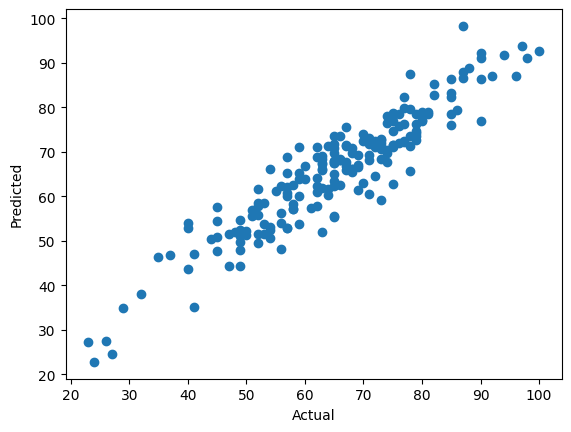

In [200]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')